In [163]:
# importing the packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [164]:
# importing the datdaset
SalesData = pd.read_csv("D:/Data Science/Case Studies/Python/Python Foundation Case Study 4 - Python Visualization Case Study/SalesData.csv")

In [165]:
SalesData.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [166]:
SalesData1 = SalesData.groupby(["Region"])[["Sales2015","Sales2016"]].sum()

In [167]:
SalesData1

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


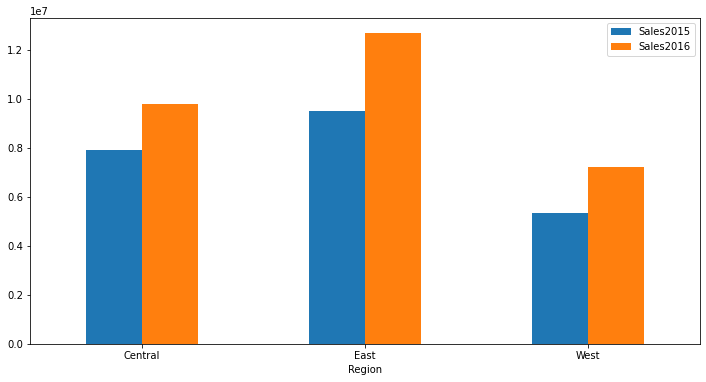

In [168]:
SalesData1graph = SalesData1.plot.bar(figsize=(12,6), rot=0)

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<AxesSubplot:ylabel='Sales2016'>], dtype=object)

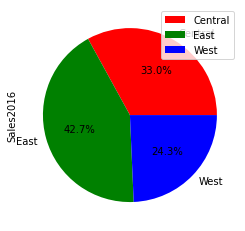

In [169]:
SalesData2 = SalesData.groupby(["Region"])[["Sales2016"]].sum()
pieLabels = ['Central', 'East', 'West']
SalesData2.plot(kind='pie', 
            labels=pieLabels, 
            colors=['r', 'g', 'b'],
            autopct='%1.1f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [170]:
SalesData3 = SalesData.groupby(["Region","Tier"])[["Sales2015","Sales2016"]].sum()

In [171]:
SalesData3

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

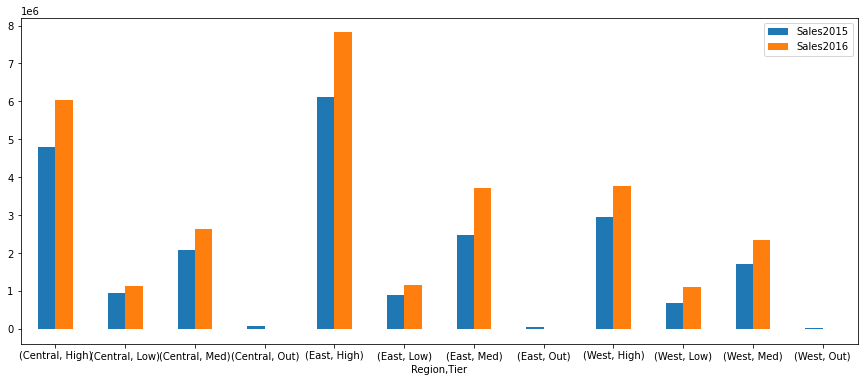

In [172]:
SalesData3graph = SalesData3.plot.bar(figsize=(15,6),rot=0)

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [173]:
SalesData4 = SalesData.groupby(["Region","State"])[["Sales2015","Sales2016"]].sum().reset_index()

In [174]:
SalesData4_East = SalesData4.loc[SalesData4.Region == 'East', ['Sales2015','Sales2016','State']]

In [175]:
SalesData4_East = SalesData4_East.set_index('State')

In the East Region, NY registered a decline in 2016


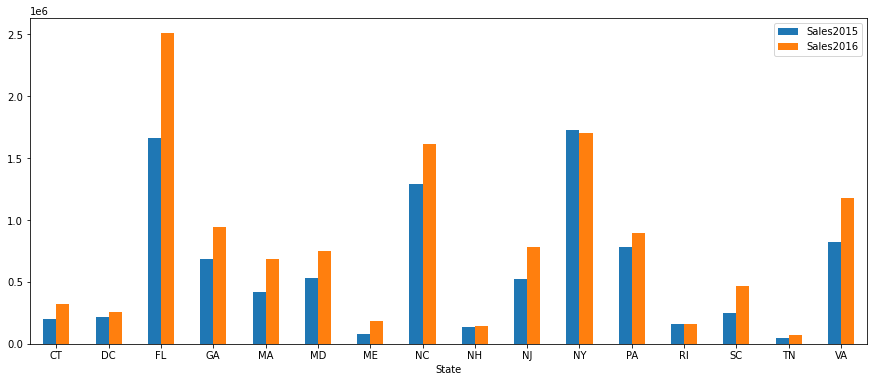

In [176]:
SalesData4graph = SalesData4_East.plot.bar(figsize=(15,6),rot=0)
print('In the East Region, NY registered a decline in 2016')

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [177]:
SalesData5 = SalesData.groupby(["Division","Tier"])[["Sales2015","Sales2016"]].sum().reset_index()

In [178]:
SalesData5.head()

,Division,Tier,Sales2015,Sales2016
0,BIG APPLE,High,563638.61,669485.03
1,BIG APPLE,Low,69462.02,79538.27
2,BIG APPLE,Med,272834.08,277194.52
3,BIG APPLE,Out,7368.96,0.00
4,CHARGERS,High,357746.20,485728.16


In [179]:
SalesData5_High = SalesData5.loc[SalesData5.Tier == 'High', ['Sales2015','Sales2016','Division']]

In [180]:
SalesData5_High = SalesData5_High.set_index('Division')

In [181]:
SalesData5_High

,Sales2015,Sales2016
Division,,
BIG APPLE,563638.61,669485.03
CHARGERS,357746.20,485728.16
CONGRESSIONAL,481600.89,591768.57
DIAMONDBACK,422571.32,487963.45
EMPIRE,908479.99,1027031.07
GRIDIRON,499841.12,623601.66
GULF STREAM,507790.52,807835.66
HAILSTORM,515226.63,691777.98
KINETIC,614482.72,667336.37


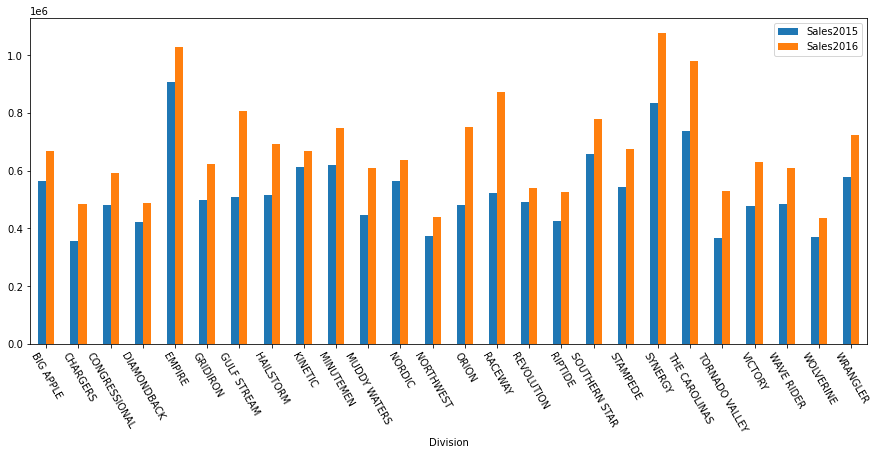

In [182]:
SalesData5graph = SalesData5_High.plot.bar(figsize=(15,6),rot=-60)

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### • Jan - Mar : Q1
### • Apr - Jun : Q2
### • Jul - Sep : Q3
### • Oct - Dec : Q4

In [188]:
SalesData['Qtr'] = 'Q' + pd.to_datetime(SalesData['Month'], format='%b').dt.quarter.astype(str)

In [190]:
SalesData.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [193]:
SalesData7 = SalesData.groupby(["Qtr"])[["Sales2015","Sales2016"]].sum()

In [194]:
SalesData7

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


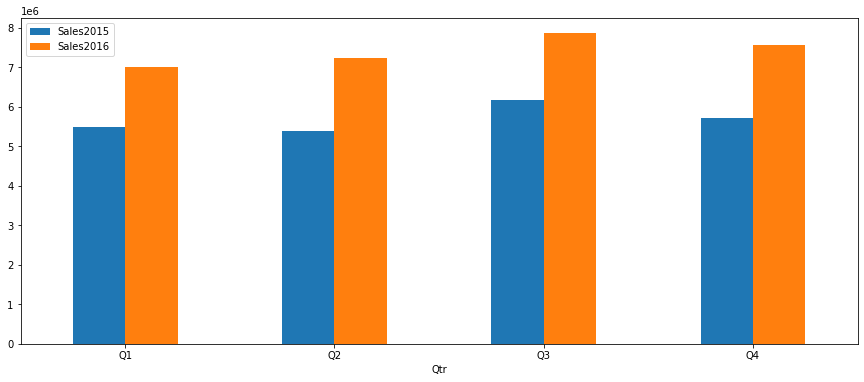

In [196]:
SalesData7graph = SalesData7.plot.bar(figsize=(15,6),rot=0)

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [212]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
SalesData8 = SalesData[SalesData['Tier']!='Out']
SalesData8 = SalesData8.groupby(["Tier","Qtr"])[["Sales2016"]].sum()
SalesData8 = SalesData8.round(decimals=0)
SalesData8 = SalesData8.stack() # long to wide data
SalesData8 = SalesData8.unstack(level=0)
SalesData8 = SalesData8.T
SalesData8

Qtr,Q1,Q2,Q3,Q4
,Sales2016,Sales2016,Sales2016,Sales2016
Tier,,,,
High,3867719.0,4130953.0,4872559.0,4740002.0
Low,948833.0,890595.0,795178.0,742659.0
Med,2181402.0,2215814.0,2197058.0,2085207.0


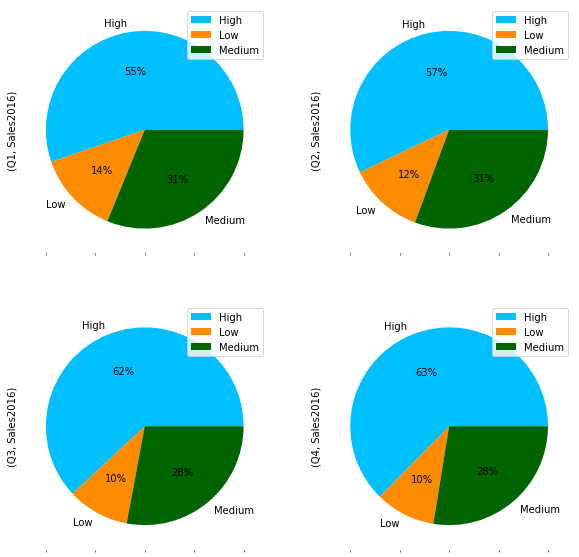

In [213]:
pielabels = ['High', 'Low', 'Medium','High']
SalesData8.plot(kind='pie', 
            labels=pielabels, 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()